In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [43]:
Base = automap_base()

# reflect an existing database into a new model

Base.prepare(engine, reflect=True)

# reflect the tables


In [44]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [130]:
# Save references to each table
meas = Base.classes.measurement

station = Base.classes.station

In [214]:
dir(station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 '_sa_registry',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'registry',
 'station']

In [61]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.

most_recent = session.query(meas.date).order_by(meas.date.desc()).first()

most_recent

('2017-08-23',)

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

In [58]:
# Calculate the date one year from the last date in data set.

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date:", last_year)

Query Date: 2016-08-23


In [80]:
# Perform a query to retrieve the data and precipitation scores

scores = session.query(meas.date, meas.prcp, meas.station).filter(meas.date >= last_year)

In [95]:
# Save the query results as a Pandas DataFrame and set the index to the date column

pscores_df = pd.DataFrame(scores, columns=['Date', 'Precipitation', 'Station'])

pscores_df.set_index('Date', inplace = True)

pscores_df

,Precipitation,Station
Date,,
2016-08-23,0.00,USC00519397
2016-08-24,0.08,USC00519397
2016-08-25,0.08,USC00519397
2016-08-26,0.00,USC00519397
2016-08-27,0.00,USC00519397
...,...,...
2017-08-19,0.09,USC00516128
2017-08-20,NaN,USC00516128
2017-08-21,0.56,USC00516128


In [96]:
# Sort the dataframe by date

pscores_df.sort_values(by = 'Date', inplace = True)

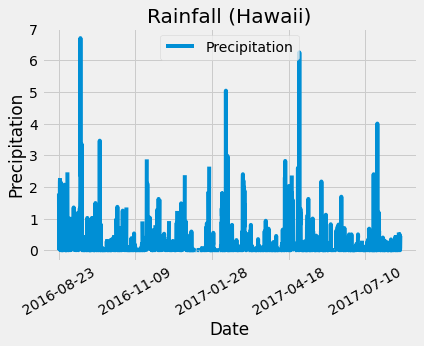

In [101]:
# Use Pandas Plotting with Matplotlib to plot the data

pgraph = pscores_df.plot(title = "Rainfall (Hawaii)", xlabel = 'Date', ylabel = 'Precipitation')
plt.xticks(rotation = 30)
pgraph.figure.savefig('Rainfall_Hawaii.png')

In [102]:
# Use Pandas to calcualte the summary statistics for the precipitation data

pscores_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [116]:
# Design a query to calculate the total number stations in the dataset

stations = session.query(station.station).count()

stations

9

In [123]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(meas.station, func.count(meas.id)).group_by(meas.station).\
order_by(func.count(meas.id).desc()).all()

active_stations                                                                                          
                                                                                          
                                                                                          

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [183]:
stations1 = session.query(meas.station, func.count(meas.id)).group_by(meas.station).\
order_by(func.count(meas.id).desc()).first()

most_active = stations1[0]

most_active
    

'USC00519281'

In [198]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp_min, temp_max, temp_avg = session.query(func.min(meas.tobs),func.max(meas.tobs),func.avg(meas.tobs)).\
filter(meas.station == most_active).order_by(meas.date).first()

In [199]:
temp_min

54.0

In [200]:
temp_max

85.0

In [201]:
temp_avg

71.66378066378067

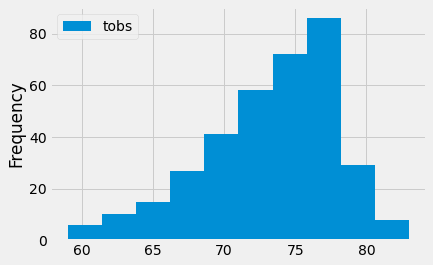

In [212]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_temp = session.query(meas.tobs).filter(meas.station == most_active).\
    filter(Measurement.date >= last_year).all()

temp_df = pd.DataFrame(most_active_temp)

temp_df.plot(kind = "hist", xlabel = 'Temp(F)', ylabel = '# of Measurements')

plt.savefig('USC00519281_Temps.png')


# Close session

In [213]:
# Close Session
session.close()